# Курсовой проект по машинному обучению
## Car price prediction
## Использование произвольных автомобильных данных для анализа предсказание цен на автомобили.

### Описание признаков
##### name: Название автомобиля (марка и модель),
##### company: Компания-производитель,
##### year: Год выпуска автомобиля,
##### price: Цена автомобиля,
##### kms_driven: Пробег автомобиля в километрах,
##### fuel_type: Тип топлива, используемого автомобилем,
##### color: Цвет автомобиля


In [508]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')

In [509]:
data=pd.read_csv('dataset/car_csv.csv')

In [510]:
data.head(10)

,ID,name,company,year,price,kms_driven,fuel_type,color,volume
0,1,KIA K5,KIA,2019,25000,85000,Petrol,Black,2.5
1,2,KIA K5,KIA,2016,18000,120000,LPG,White,2.0
2,3,KIA K5,KIA,2020,27000,65000,LPG,Blue,2.0
3,4,KIA K5,KIA,2018,22000,140000,Petrol,Silver,2.5
4,5,KIA K5,KIA,2017,20000,90000,LPG,Gray,2.0
5,6,KIA K5,KIA,2021,30000,45000,LPG,White,2.0
6,7,KIA K5,KIA,2019,25000,85000,Petrol,Black,2.5
7,8,KIA K5,KIA,2016,18000,120000,LPG,White,2.0
8,9,KIA K5,KIA,2020,27000,65000,LPG,Blue,2.0
9,10,KIA K5,KIA,2018,22000,140000,Petrol,Silver,2.5


In [511]:
data.shape

(1487, 9)

In [512]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1487 entries, 0 to 1486
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1487 non-null   int64  
 1   name        1487 non-null   object 
 2   company     1487 non-null   object 
 3   year        1487 non-null   int64  
 4   price       1487 non-null   int64  
 5   kms_driven  1487 non-null   int64  
 6   fuel_type   1487 non-null   object 
 7   color       1487 non-null   object 
 8   volume      1487 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 104.7+ KB


In [513]:
data['name']=data['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [514]:
data=data.reset_index(drop=True)

In [515]:
data

,ID,name,company,year,price,kms_driven,fuel_type,color,volume
0,1,KIA K5,KIA,2019,25000,85000,Petrol,Black,2.5
1,2,KIA K5,KIA,2016,18000,120000,LPG,White,2.0
2,3,KIA K5,KIA,2020,27000,65000,LPG,Blue,2.0
3,4,KIA K5,KIA,2018,22000,140000,Petrol,Silver,2.5
4,5,KIA K5,KIA,2017,20000,90000,LPG,Gray,2.0
...,...,...,...,...,...,...,...,...,...
1482,1496,TOYOTA CAMRY 70,TOYOTA,2020,24500,85000,Hybrid,Blue,2.5
1483,1497,TOYOTA CAMRY 70,TOYOTA,2021,25500,75000,Hybrid,White,2.5
1484,1498,TOYOTA CAMRY 70,TOYOTA,2021,26500,80000,Hybrid,Black,2.5
1485,1499,TOYOTA CAMRY 70,TOYOTA,2022,27500,70000,Hybrid,Blue,2.5


In [516]:
data.to_csv('dataset/_cleaned_data_cars.csv',index = False)

In [517]:
data.describe(include='all')

,ID,name,company,year,price,kms_driven,fuel_type,color,volume
count,1487.000000,1487,1487,1487.000000,1487.000000,1487.000000,1487,1487,1487.000000
unique,NaN,3,3,NaN,NaN,NaN,4,8,NaN
top,NaN,HONDA FIT,HONDA,NaN,NaN,NaN,Petrol,White,NaN
freq,NaN,501,501,NaN,NaN,NaN,990,381,NaN
mean,753.322798,NaN,NaN,2015.316745,18541.640888,124891.065232,NaN,NaN,2.046200
std,434.170403,NaN,NaN,6.707894,8419.181998,82513.358192,NaN,NaN,0.605857
min,1.000000,NaN,NaN,2001.000000,4077.000000,100.000000,NaN,NaN,1.000000
25%,372.500000,NaN,NaN,2009.000000,9600.000000,65000.000000,NaN,NaN,1.500000
50%,758.000000,NaN,NaN,2018.000000,19750.000000,100000.000000,NaN,NaN,2.000000
75%,1128.500000,NaN,NaN,2020.000000,25500.000000,170000.000000,NaN,NaN,2.500000


In [518]:
data['company'].unique()

array(['KIA', 'HONDA', 'TOYOTA'], dtype=object)

In [519]:
data.isnull().sum()

ID            0
name          0
company       0
year          0
price         0
kms_driven    0
fuel_type     0
color         0
volume        0
dtype: int64

In [520]:
data['company'].unique()

array(['KIA', 'HONDA', 'TOYOTA'], dtype=object)

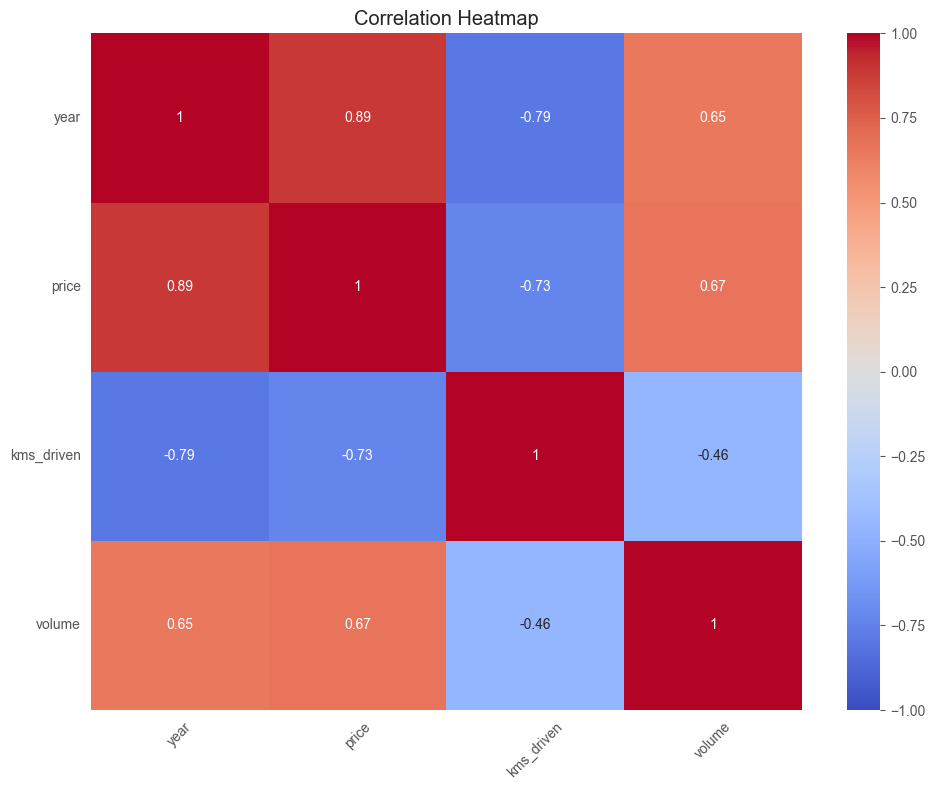

In [521]:
import seaborn as sns

# Вычисление корреляций
numeric_cols = ['year', 'price', 'kms_driven','volume']
corr_matrix = data[numeric_cols].corr()

# Построение тепловой карты с помощью Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Построение модели

In [522]:
# Разделение данных на X и Y
X=data[['name','company','year','kms_driven','fuel_type','volume','color']]
y=data['price']

In [523]:
# выводим X
X

,name,company,year,kms_driven,fuel_type,volume,color
0,KIA K5,KIA,2019,85000,Petrol,2.5,Black
1,KIA K5,KIA,2016,120000,LPG,2.0,White
2,KIA K5,KIA,2020,65000,LPG,2.0,Blue
3,KIA K5,KIA,2018,140000,Petrol,2.5,Silver
4,KIA K5,KIA,2017,90000,LPG,2.0,Gray
...,...,...,...,...,...,...,...
1482,TOYOTA CAMRY 70,TOYOTA,2020,85000,Hybrid,2.5,Blue
1483,TOYOTA CAMRY 70,TOYOTA,2021,75000,Hybrid,2.5,White
1484,TOYOTA CAMRY 70,TOYOTA,2021,80000,Hybrid,2.5,Black
1485,TOYOTA CAMRY 70,TOYOTA,2022,70000,Hybrid,2.5,Blue


#### Импортирование нужных библиотек

In [524]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [525]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [526]:
#Преобразование категориальных переменных в бинарные 
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type','color']])

OneHotEncoder()

In [527]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type','color']),
remainder='passthrough')

## Использование Decision Tree Regrossor

In [528]:
dtr=DecisionTreeRegressor()

In [529]:
pipe=make_pipeline(column_trans,dtr)

In [530]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['HONDA FIT', 'KIA K5', 'TOYOTA CAMRY 70'], dtype=object),
                                                                            array(['HONDA', 'KIA', 'TOYOTA'], dtype=object),
                                                                            array(['Hybrid', 'LPG', 'Petrol', 'Petroll'], dtype=object),
                                                                            array(['Black', 'Blue', 'Gray', 'Green', 'Red', 'Silver', 'White',
       'Yellow'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type', 'color'])])),
                ('decisiontreeregressor', DecisionTreeRegressor())])

In [531]:
y_pred=pipe.predict(X_test)

In [532]:
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Model: Decision Tree ')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Model: Decision Tree 
Mean Squared Error: 3781318.08
R^2 Score: 0.95


In [534]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['HONDA FIT','HONDA',2003,130000,'Petrol',1.3,'Black']).reshape(1,7)))

array([8416.66666667])

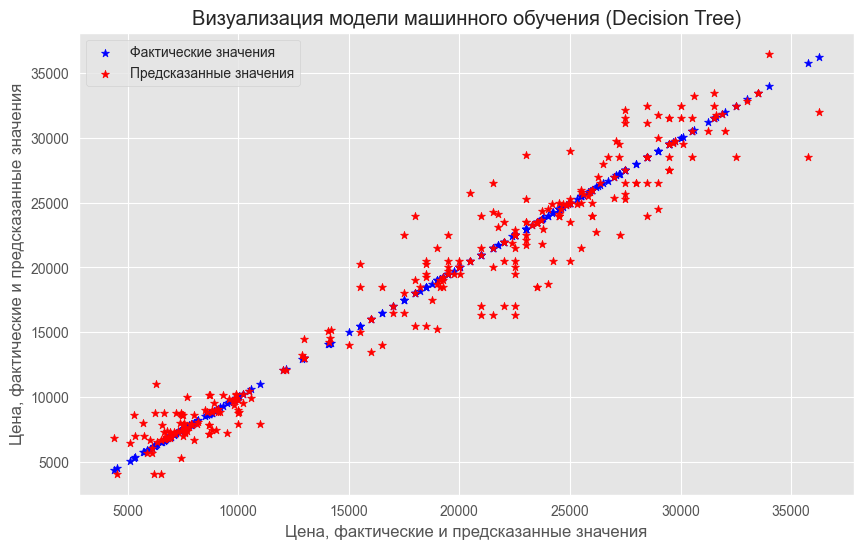

In [535]:
# Визуализация модели
plt.figure(figsize=(10, 6))

# График фактических и предсказанных значений
plt.scatter(y_test, y_test, color='blue', marker='*', label='Фактические значения')
plt.scatter(y_test, y_pred, color='red', marker='*', label='Предсказанные значения')

plt.title('Визуализация модели машинного обучения (Decision Tree)')
plt.xlabel('Цена, фактические и предсказанные значения')
plt.ylabel('Цена, фактические и предсказанные значения')
plt.legend()
plt.grid(True)
plt.show()

In [536]:
## Random Forest
rf = RandomForestRegressor()

In [537]:
pipeRF=make_pipeline(column_trans,rf)

In [538]:
pipeRF.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['HONDA FIT', 'KIA K5', 'TOYOTA CAMRY 70'], dtype=object),
                                                                            array(['HONDA', 'KIA', 'TOYOTA'], dtype=object),
                                                                            array(['Hybrid', 'LPG', 'Petrol', 'Petroll'], dtype=object),
                                                                            array(['Black', 'Blue', 'Gray', 'Green', 'Red', 'Silver', 'White',
       'Yellow'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type', 'color'])])),
                ('randomforestregressor', RandomForestRegressor())])

In [539]:
y_predRF=pipeRF.predict(X_test)

In [540]:
r2 = r2_score(y_test,y_predRF)
mae = mean_absolute_error(y_test, y_predRF)
mse = mean_squared_error(y_test, y_predRF)

print('Model: Random Forest ')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Model: Random Forest 
Mean Squared Error: 2698284.51
R^2 Score: 0.96


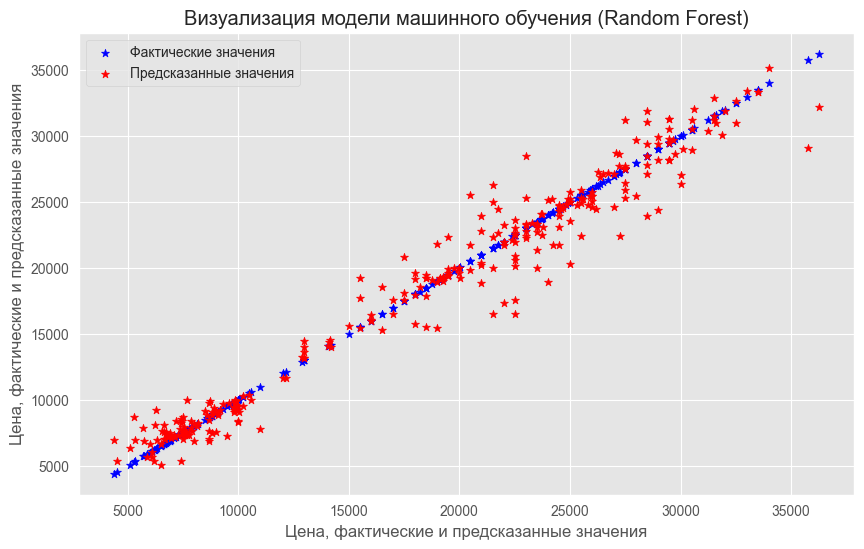

In [541]:
# Визуализация модели
plt.figure(figsize=(10, 6))

# График фактических и предсказанных значений
plt.scatter(y_test, y_test, color='blue', marker='*', label='Фактические значения')
plt.scatter(y_test, y_predRF, color='red', marker='*', label='Предсказанные значения')

plt.title('Визуализация модели машинного обучения (Random Forest)')
plt.xlabel('Цена, фактические и предсказанные значения')
plt.ylabel('Цена, фактические и предсказанные значения')
plt.legend()
plt.grid(True)
plt.show()

### Linear Regression

In [542]:
lr = LinearRegression()
pipeLR = make_pipeline(column_trans, lr)
pipeLR.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['HONDA FIT', 'KIA K5', 'TOYOTA CAMRY 70'], dtype=object),
                                                                            array(['HONDA', 'KIA', 'TOYOTA'], dtype=object),
                                                                            array(['Hybrid', 'LPG', 'Petrol', 'Petroll'], dtype=object),
                                                                            array(['Black', 'Blue', 'Gray', 'Green', 'Red', 'Silver', 'White',
       'Yellow'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type', 'color'])])),
                ('linearregression', LinearRegression())])

In [543]:
y_predLR=pipeLR.predict(X_test)

In [544]:
r2 = r2_score(y_test,y_predLR)
mae = mean_absolute_error(y_test, y_predLR)
mse = mean_squared_error(y_test, y_predLR)

print('Model: Random Forest ')
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Model: Random Forest 
Mean Squared Error: 7858719.78
R^2 Score: 0.89


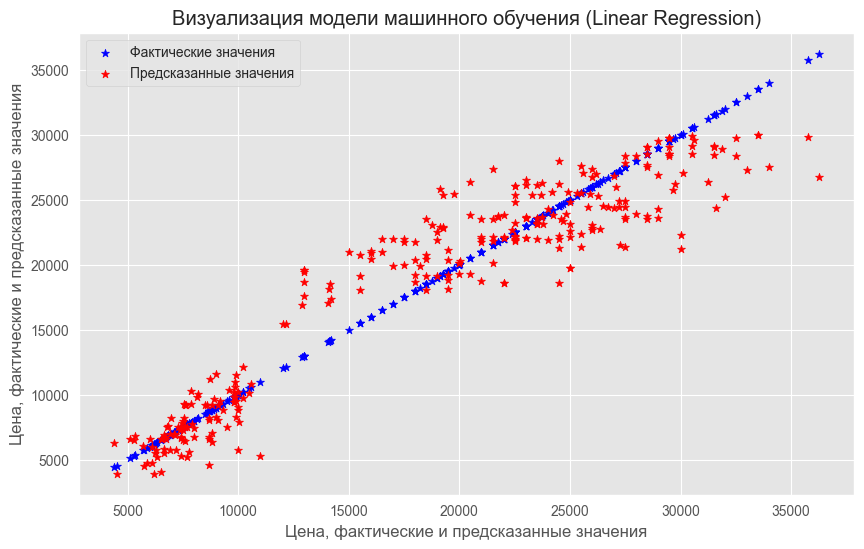

In [545]:
# Визуализация модели
plt.figure(figsize=(10, 6))

# График фактических и предсказанных значений
plt.scatter(y_test, y_test, color='blue', marker='*', label='Фактические значения')
plt.scatter(y_test, y_predLR, color='red', marker='*', label='Предсказанные значения')

plt.title('Визуализация модели машинного обучения (Linear Regression)')
plt.xlabel('Цена, фактические и предсказанные значения')
plt.ylabel('Цена, фактические и предсказанные значения')
plt.legend()
plt.grid(True)
plt.show()

###  Выбор модели 

### Самой лечшей модели стал random forest
#### Model: Random Forest 
#### Mean Squared Error: 2656910.74
#### R^2 Score: 0.96

### Импортирование данных в pickle

In [546]:
import pickle
pickle.dump(pipeRF,open('RandomForestRegressionModel.pkl','wb'))

In [549]:
pipeRF.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['HONDA FIT','HONDA',2003,100000,'Petrol',1.3,'Black']).reshape(1,7)))

array([7670.16380952])

In [550]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['HONDA FIT', 'KIA K5', 'TOYOTA CAMRY 70'], dtype=object)